In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Motivation

We can view pretty much all of **machine learning (ML)** (and this is one of many possible views) as an **optimization** exercise. Our challenge in supervized learning is to find a function that maps the inputs of a certain system to its outputs. Since we don't have direct access to that function, we have to estimate it. We aim to find the *best* possible estimate. Whenever we use the word "best" in mathematics, we imply some kind of optimization. Thus we either maximize some **performance function**, which increases for better estimates, or minimize some **loss function**, which decreases for better estimates. In general, we refer to the function that we optimize as the **objective function**.

There are elements of both science and art in the choice of performance/loss functions. For now let us focus on optimization itself.

# Univariate functions

From school many of us remember how to optimize functions of a single scalar variable &mdash; **univariate** functions, such as, for example,
$$f(x) = -2x^2 + 6x + 9.$$

In Python we would define this function as

In [3]:
def func(x): return -2. * x**2 + 6. * x + 9.

So we can pass values of $x$ to it as arguments and obtain the corresponding values $f(x)$ as the function's return value:

In [4]:
func(0.)

9.0

Whenever we are dealing with functions, it is always a good idea to visually examine their graphs:

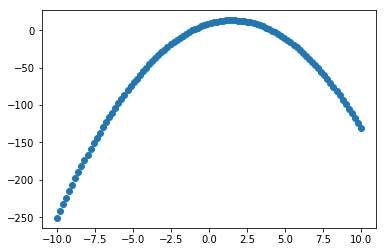

In [5]:
xs = np.linspace(-10., 10., 100)
fs = [func(x) for x in xs]
plt.plot(xs, fs, 'o');

Unsurprisingly (if we remember high school mathematics), the graph of our univariate **quadratic** (because the highest power of $x$ in it comes as $x^2$) function is a **parabola**. We are lucky: this function is **concave** &mdash; if we join any two points on its graph, the straight line joining them will always lie below the graph. For such functions we can usually find the **global optimum** (**minimum** or **maximum**, in this case the function has a single **global maximum**).

# Global versus local optima

We say **global** optimum, because a function may have multiple optima. All of them are called **local** optima, but only the largest maxima (the smallest minima) are referred to as **global**.

Consider the function
$$f(x) = x \cos(x).$$
It has numerous local minima and local maxima over $x \in \mathbb{R}$, but no global minimum/maximum:

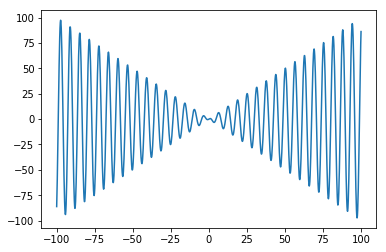

In [6]:
xs = np.linspace(-100., 100., 1000)
fs = xs * np.cos(xs)
plt.plot(xs, fs);

Now consider the function
$$f(x) = \frac{1}{x} \sin(x).$$
It has a single global maximum, two global minima, and infinitely many local maxima and minima.

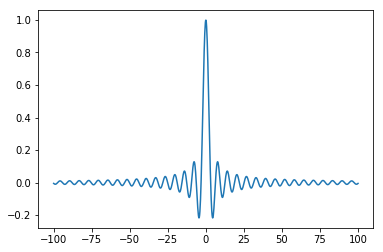

In [7]:
xs = np.linspace(-100., 100., 1000)
fs = (1./xs) * np.sin(xs)
plt.plot(xs, fs);

# High school optimization

Many of us remember from school this method of optimising functions. For our function, say
$$f(x) = -2x^2 + 6x + 9,$$
find the function's derivative. If we forgot how to differentiate functions, we can look up the rules of differentiation, say, on Wikipedia. In our example, differentiation is straightforward, and yields
$$\frac{d}{dx}f(x) = -4x + 6.$$

However, if we have completely forgotten the rules of differentiation, one particular Python library &mdash; the one for doing symbolic maths &mdash; comes in useful:

In [8]:
import sympy
x = sympy.symbols('x')
func_diff = sympy.diff(-2. * x**2 + 6. * x + 9, x)
func_diff

-4.0*x + 6.0

Our next step is to find such $x$ (we'll call it $x_{\text{max}}$), at which this derivative becomes zero. This notation is somewhat misleading, because it is $f(x_{\text{max}})$ that is maximum, not $x_{\text{max}}$ itself; $x_{\text{max}}$ is the *location* of the function's maximum:
$$\frac{d}{dx}f(x_{\text{max}}) = 0,$$
i.e.
$$-4x_{\text{max}} + 6 = 0.$$
Hence the solution is

$$x_{\text{max}} = -6 / (-4) = 3/2 = 1.5$$

We could also use SymPy to solve the above equation:

In [9]:
roots = sympy.solve(func_diff, x)
roots

[1.50000000000000]

In [10]:
x_max = roots[0]

In order to check that the value is indeed a local maximum and not a local minimum (and not a **saddle point**, look them up), we look at the second derivative of the function,
$$\frac{d^2}{dx^2}f(x_{\text{max}}) = -4.$$
Since this second derivative is negative at $x_{\text{max}}$, we are indeed looking at an (at least local) maximum. In this case we are lucky: this is also a global maximum. However, in general, it isn't easy to check mathematically whether an optimum global or not. This is one of the major challenges in optimization.

Let us now find the value of the function at the maximum by plugging in $x_{\text{max}}$ into $f$:

$$f_{\text{max}} = f(x_{\text{max}}) = -2 x_{\text{max}}^2 + 6 x_{\text{max}} + 9 = -2 \cdot 1.5^2 + 6 \cdot 1.5 + 9 = 13.5.$$

In [11]:
f_max = func(x_max)
f_max

13.5000000000000

Let us label this maximum on the function's graph:

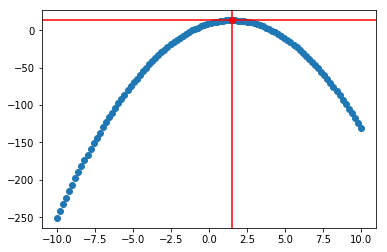

In [12]:
xs = np.linspace(-10., 10., 100)
fs = [func(x) for x in xs]
plt.plot(xs, fs, 'o')
plt.plot(x_max, f_max, 'o', color='red')
plt.axvline(x_max, color='red')
plt.axhline(f_max, color='red');

# Multivariate functions

So far we have considered the optimization of **real-valued** functions of a single real variable, i.e. $f: \mathbb{R} \rightarrow \mathbb{R}$.

However, most functions that we encounter in data science and machine learning are **multivariate**, i.e. $f: \mathbb{R}^n \rightarrow \mathbb{R}$. Moreover, some are also **multivalued**, i.e. $f: \mathbb{R}^n \rightarrow \mathbb{R}^m$.

(Note: univariate/multivariate refers to the function's argument, whereas single-valued/multi-valued to the function's output.)

Consider, for example, the following single-valued, multivariate function:
$$f(x_1, x_2) = -x_1^2 - x_2^2 + 6x_1 + 3x_2 + 9.$$

We could define it in Python as

In [13]:
def func(x1, x2): return -x1**2 - x2**2 + 6.*x1 + 3.*x2 + 9.

Let's plot its graph. First, we need to compute the values of the function on a two-dimensional mesh grid:

In [14]:
x1s, x2s = np.meshgrid(np.linspace(-100., 100., 100), np.linspace(-100., 100., 100))
fs = func(x1s, x2s)
np.shape(fs)

(100, 100)

Then we can use the following code to produce a 3D plot:

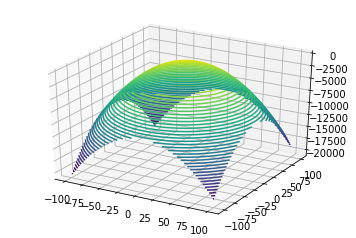

In [15]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(x1s, x2s, fs, 50);

It may be more convenient to implement multivariate functions as functions of a single vector (more precisely, rank-1 NumPy array) in Python:

In [16]:
def func(x): return -x[0]**2 - x[1]**2 + 6.*x[0] + 3.*x[1] + 9.

# Optimising multivariate functions analytically

The analytical method of finding the optimum of a multivariate function is similar to that for univariate functions. As the function has mutliple arguments, we need to find its so-called **partial derivative** with respect to each argument. They are computed similarly to normal derivatives, while pretending that all the other arguments are constants:
$$\frac{\partial}{\partial x_1} f(x_1, x_2) = -2x_1 + 6,$$
$$\frac{\partial}{\partial x_2} f(x_1, x_2) = -2x_2 + 3.$$

We call the vector of the function's partial derivatives its **gradient** vector, or **grad**:
$$\nabla f(x_1, x_2) = \begin{pmatrix} \frac{\partial}{\partial x_1} f(x_1, x_2) \\ \frac{\partial}{\partial x_2} f(x_1, x_2) \end{pmatrix}.$$

When the function is continuous and differentiable, all the partial derivatives will be 0 at a local maximum or minimum point. Saying that all the partial derivatives are zero at a point, $(x_1^*, x_2^*)$, is the same as saying the gradient at that point is the zero vector:
$$\nabla f(x_1^*, x_2^*) = \begin{pmatrix} \frac{\partial}{\partial x_1} f(x_1^*, x_2^*) \\ \frac{\partial}{\partial x_2} f(x_1^*, x_2^*) \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} = \mathbf{0}.$$

In our example, we can easily establish that the gradient vector is zero at $x_1^* = 3$, $x_2^* = 1.5$. And the maximum value that is achieved is

In [17]:
func([3, 1.5])

20.25

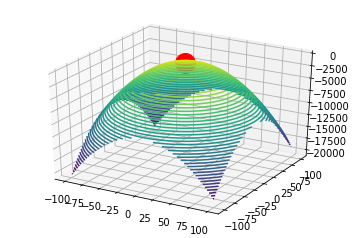

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.contour3D(x1s, x2s, fs, 50)
ax.plot([3], [1.5], [20.25], 'o', color='red', markersize=20);

# The Jacobian

Notice that, for multivalued (not just multivariate) functions, $\mathbb{R}^n \rightarrow \mathbb{R}^m$, the **gradient** vector of partial derivatives generalizes to the **Jacobian** matrix:
$$\mathbf{J} = \begin{pmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} & \cdots & \frac{\partial f_1}{\partial x_n} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{\partial f_m}{\partial x_1} & \frac{\partial f_m}{\partial x_2} & \cdots & \frac{\partial f_m}{\partial x_n} \end{pmatrix}.$$

# Newton-Raphson's method

**Newton-Raphson's method** is a numerical procedure for finding zeros (**roots**) of functions.

For example, consider again the function
$$f(x) = -2x^2 + 6x + 9.$$

In [19]:
def func(x): return -2. * x**2 + 6. * x + 9.

We have already found that its derivative is given by
$$\frac{df}{dx}(x) = -4x + 6.$$

In [20]:
def func_diff(x): return -4. * x + 6.

The Newton-Raphson method starts with some initial guess, $x_0$, and then proceeds iteratively:

$$x_{n+1} = x_n - \frac{f(x_n)}{\frac{d}{dx}f(x_n)}$$

Let's code it up:

In [21]:
def newton_raphson_method(f, fdiff, x0, iter_count=10):
    x = x0
    print('x_0', x0)
    for i in range(iter_count):
        x = x - f(x) / fdiff(x)
        print('x_%d' % (i+1), x)
    return x

Now let's apply it to our function:

In [22]:
newton_raphson_method(func, func_diff, -5.)

x_0 -5.0
x_1 -2.269230769230769
x_2 -1.280023547880691
x_3 -1.1040302676228468
x_4 -1.0980830182607666
x_5 -1.0980762113622329
x_6 -1.098076211353316
x_7 -1.098076211353316
x_8 -1.098076211353316
x_9 -1.098076211353316
x_10 -1.098076211353316


-1.098076211353316

We see that the method converges quite quickly to (one of the) roots. Notice that, which of the two roots we converge to depends on the initial guess:

In [23]:
newton_raphson_method(func, func_diff, x0=5.)

x_0 5.0
x_1 4.214285714285714
x_2 4.1005639097744355
x_3 4.098077401218985
x_4 4.098076211353589
x_5 4.098076211353316
x_6 4.098076211353316
x_7 4.098076211353316
x_8 4.098076211353316
x_9 4.098076211353316
x_10 4.098076211353316


4.098076211353316

**Newton-Raphson** is a **root finding**, not an **optimization**, algorithm. However, recall that optimization is equivalent to finding the root of the derivative function. Thus we can apply this algorithm to the derivative function (we also need to provide the second derivative function) to find a local optimum of the function:

In [24]:
def func_diff2(x): return -4.

In [25]:
newton_raphson_method(func_diff, func_diff2, -5.)

x_0 -5.0
x_1 1.5
x_2 1.5
x_3 1.5
x_4 1.5
x_5 1.5
x_6 1.5
x_7 1.5
x_8 1.5
x_9 1.5
x_10 1.5


1.5

The result is consistent with our analytical solution.

# Newton's method for multivariate functions

Newton's method can be generalized to mutlivariate functions. For multivalued multivariate functions $f: \mathbb{R}^k \rightarrow \mathbb{R}^k$, the method becomes
$$x_{n+1} = x_n - \mathbf{J}(x_n)^{-1} f(x_n),$$
where $\mathbf{J}$ is the Jacobian.

Since inverses are only defined for square matrices, for functions $f: \mathbb{R}^k \rightarrow \mathbb{R}^m$, we use the Moore-Penrose pseudoinverse $\mathbf{J}^+ = (\mathbf{J}^T \mathbf{J})^{-1} \mathbf{J}^T$ instead of $\mathbf{J}^{-1}$. Let's code this up.

Inside our generalized implementation of Newton-Raphson, we'll be working with vectors. It's probably a good idea to assume that the function and the Jacobian return rank-2 NumPy arrays.

However, one may have coded up the function as

In [26]:
def func(x): return -x[0]**2 - x[1]**2 + 6.*x[0] + 3.*x[1] + 9.

and the Jacobian as

In [27]:
def func_diff(x): return np.array([-2.*x[0] + 6., -2.*x[1] + 3.])

Let's see how we can convert NumPy stuff to rank-2 arrays. For rank-1 arrays:

In [28]:
a = np.array([3., 5., 7.])
np.reshape(a, (np.shape(a)[0], -1))

array([[ 3.],
       [ 5.],
       [ 7.]])

if we want a column (rather than row) vector, which is probably a sensible default. If we wanted a row vector, we could do

In [29]:
np.reshape(a, (-1, np.shape(a)[0]))

array([[ 3.,  5.,  7.]])

Existing rank-2 arrays remain unchanged by this:

In [30]:
a = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
np.reshape(a, (np.shape(a)[0], -1))

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

In [31]:
np.reshape(a, (-1, np.shape(a)[0]))

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

For scalars, `np.shape(a)[0]` won't work, as their shape is `()`, so we need to do something special. Based on this information, let us implement the auxiliary function `to_rank_2`:

In [32]:
def to_rank_2(arg, row_vector=False):
    shape = np.shape(arg)
    size = 1 if len(shape) == 0 else shape[0]
    new_shape = (-1, size) if row_vector else (size, -1)
    return np.reshape(arg, new_shape)

And test it:

In [33]:
to_rank_2(5.)

array([[ 5.]])

In [34]:
to_rank_2([1., 2., 3.])

array([[ 1.],
       [ 2.],
       [ 3.]])

In [35]:
to_rank_2([[1.], [2.], [3.]])

array([[ 1.],
       [ 2.],
       [ 3.]])

In [36]:
to_rank_2([[1., 2., 3.]])

array([[ 1.,  2.,  3.]])

In [37]:
to_rank_2([[1., 2., 3], [4., 5., 6.]])

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

Now let's generalize our implementation of the Newton-Raphson method:

In [38]:
def newton_raphson_method(f, fdiff, x0, iter_count=10):
    x = to_rank_2(x0)
    for i in range(iter_count):
        f_x = to_rank_2(f(x))
        fdiff_x = to_rank_2(fdiff(x), row_vector=True)
        non_square_jacobian_inv = np.dot(np.linalg.inv(np.dot(fdiff_x.T, fdiff_x)), fdiff_x.T)
        x = x - np.dot(non_square_jacobian_inv, f_x)
        print('x_%d' % (i+1), x)
    return x

In [39]:
newton_raphson_method(func, func_diff, np.array([-10., -10.]), iter_count=5)

x_1 [[-80.25 ]
 [ 25.125]]
x_2 [[-80.25 ]
 [ 25.125]]
x_3 [[-80.25 ]
 [ 25.125]]
x_4 [[-80.25 ]
 [ 25.125]]
x_5 [[-80.25 ]
 [ 25.125]]


array([[-80.25 ],
       [ 25.125]])

In [40]:
func_diff([-80.25, 25.125])

array([ 166.5 ,  -47.25])

**NB! TODO: The above doesn't seem to work at the moment. The returned optimum is wrong. Can you spot a problem with the above implementation?**

# Quasi-Newton method

In practice, we may not always have access to the Jacobian of a function. There are numerical methods, known as **quasi-Newton methods**, which approximate the Jacobian numerically.

One such method is the **Broyden-Fletcher-Goldfarb-Shanno (BFGS)** algorithm. It is generally a bad idea to implement these algorithms by hand, since their implementations are often nuanced and nontrivial.

Fortunately, Python libraries provide excellent implementations of optimization algorithms.

Let us use SciPy to optimize our function.

Remember that to maximize a function we simply minimize its negative, which is what we achieve with the Python lambda below:

In [41]:
import scipy.optimize
scipy.optimize.minimize(lambda x: -func(x), np.array([-80., 25.]), method='BFGS')

      fun: -20.249999999999446
 hess_inv: array([[ 0.53711516,  0.13107271],
       [ 0.13107271,  0.96288482]])
      jac: array([  1.43051147e-06,  -4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([ 3.0000007 ,  1.49999975])

# Grid search

What we have considered so far isn't the most straightforward optimization procedure. A natural first thing to do is often the **grid search**.

In grid search, we pick a subset of the parameter search, usually a rectangular grid, evaluate the value at each grid point and pick the point where the function is largest (smallest) as the approximate location of the maximum (minimum).

As a by-product of the grid search we get a heat-map &mdash; an excellent way of visualising the magnitude of the function on the parameter space.

If we have more than two parameters, we can produce heatmaps for each parameter pair. (E.g., for a three-dimensional function, $(x_1, x_2)$, $(x_1, x_3)$, $(x_2, x_3)$.)

Grid search is often useful for **tuning** machine learning **hyperparameters** and finding optimal values for trading (and other) strategies, in which case a single evaluation of the objective function may correspond to a single backtest run over all available data.

Let us use the following auxiliary function from https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

In [49]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Arguments:
        data       : A 2D numpy array of shape (N,M)
        row_labels : A list or array of length N with the labels
                     for the rows
        col_labels : A list or array of length M with the labels
                     for the columns
    Optional arguments:
        ax         : A matplotlib.axes.Axes instance to which the heatmap
                     is plotted. If not provided, use current axes or
                     create a new one.
        cbar_kw    : A dictionary with arguments to
                     :meth:`matplotlib.Figure.colorbar`.
        cbarlabel  : The label for the colorbar
    All other arguments are directly passed on to the imshow call.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

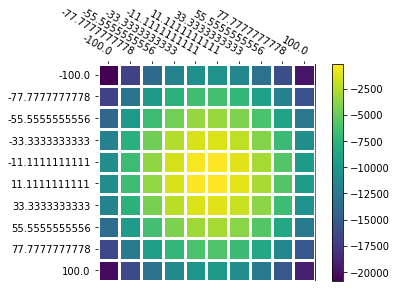

In [51]:
def func(x1, x2): return -x1**2 - x2**2 + 6.*x1 + 3.*x2 + 9.
x1s_ = np.linspace(-100., 100., 10)
x2s_ = np.linspace(-100., 100., 10)
x1s, x2s = np.meshgrid(x1s_, x2s_)
fs = func(x1s, x2s)
np.shape(fs)
heatmap(fs, x1s_, x2s_)[0];

# Random search

Sometimes a **random search** may be preferred over grid search. This also enables us to incorporate our guess &mdash; a prior distribution &mdash; of the location of the optimum, so we can sample the parameter points from that prior distribution and evaluate the values of the function at those points.

Both **grid search** and **random search** are the so-called **embarrassingly parallel** methods and are trivial to parallelize, either over multiple cores on a single machine or over a cluster/cloud.

In general, it is suboptimal to explore a hypercube of the parameter space by systematically going through each point in a grid. Sobol sequences give the optimal sequence of points to try &mdash; see Sergei Kucherenko's work in this area.

# Stochastic and batch gradient descent

When working with **aritificial neural networks (ANNs)** we usually prefer the **stochastic** and **batch gradient descent methods** over the quasi-Newton methods. We will examine these methods when we introduce ANNs.